<a href="https://colab.research.google.com/github/david-lab17/clusterigAlgorithm/blob/master/Copy_of_Loan_Limit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as plt 
import seaborn as sns



import datetime 
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import plotly.express as px
#pd.set_option('float_format', '{:2f}'.format)
pd.options.display.float_format = "{:,.2f}".format

pd.set_option('display.max_rows', 100)

%config InlineBackend.figure_format = 'svg'

In [ ]:
file = 'txns.xlsx'


#DATA USED

In [ ]:
df = pd.read_excel(file)
df

,TRANSACTIO_ID,ACCOUNT_NO,DRCR,CREATED_ON,STATUS,AMOUNT
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
435597,051815220625,9030017730915,C,18/MAY/22 15:24:50.741990000,0.00,"25,000.00"
435598,051815220625,256782533304001,D,18/MAY/22 15:24:50.742919000,0.00,830.00
435599,051815220625,9030017730915,C,18/MAY/22 15:24:50.743049000,0.00,830.00
435600,051815220625,256782533304001,D,18/MAY/22 15:24:50.743600000,0.00,125.00


#DATA PREPROCESSING
##This is the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.drop_duplicates(subset=['account_no'])

,transactio_id,account_no,drcr,created_on,status,amount
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
434027,PNT023097873,207752223499007,C,24/APR/22 14:11:17.071388000,0.00,"2,000.00"
434465,254710180032,256779349837001,C,27/APR/22 10:50:45.154661000,0.00,"79,000.00"
434481,316244784316,256772530110001,C,27/APR/22 14:18:27.105631000,0.00,"310,000.00"
434595,184686905186,207772530110007,C,27/APR/22 14:20:26.262173000,0.00,620.00


In [ ]:
print(len(df))


435602


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435602 entries, 0 to 435601
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   transactio_id  435602 non-null  object 
 1   account_no     435602 non-null  int64  
 2   drcr           435602 non-null  object 
 3   created_on     435602 non-null  object 
 4   status         435498 non-null  float64
 5   amount         435602 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.9+ MB


###There are missing value in status column

In [ ]:
df.dropna(inplace = True)


###Cast Account number as object

In [ ]:
df['account_no'] = df['account_no'].astype('object')

In [ ]:
df

,transactio_id,account_no,drcr,created_on,status,amount
0,043890882181,256772022525001,D,06/APR/22 10:38:47.177641000,0.00,"380,000.00"
1,043890882181,256780225623001,C,06/APR/22 10:38:47.179493000,0.00,"380,000.00"
2,PNT023090693,9030017730915,D,06/APR/22 10:39:34.911677000,0.00,"2,000.00"
3,PNT023090693,207771137061007,C,06/APR/22 10:39:34.915462000,0.00,"2,000.00"
4,LL5861990349,204215453001,D,06/APR/22 11:11:39.133725000,0.00,"200,000.00"
...,...,...,...,...,...,...
435597,051815220625,9030017730915,C,18/MAY/22 15:24:50.741990000,0.00,"25,000.00"
435598,051815220625,256782533304001,D,18/MAY/22 15:24:50.742919000,0.00,830.00
435599,051815220625,9030017730915,C,18/MAY/22 15:24:50.743049000,0.00,830.00
435600,051815220625,256782533304001,D,18/MAY/22 15:24:50.743600000,0.00,125.00


In [ ]:
df.describe()

,status,amount
count,"435,498.00","435,498.00"
mean,"3,469.63","196,914.02"
std,"101,407.50","791,567.43"
min,0.00,1.00
25%,0.00,"1,000.00"
50%,0.00,"5,000.00"
75%,0.00,"70,000.00"
max,"3,006,201.00","186,000,000.00"


In [ ]:
df[df['amount']<0]


,transactio_id,account_no,drcr,created_on,status,amount


### Our data has zero Negative amount transacted but we will pick only positive amount (future use)

In [ ]:
df = df[df['amount']>0]


In [ ]:
##Remove time from date
pd.to_datetime(df['created_on']).dt.date
#change date format to yy/mm/dd
df['created_on'] = pd.to_datetime(df['created_on'])

In [ ]:
print(len(df['status'].unique()))


19


#FEATURE ENGINEERING
-Derive new features per every Transactional Account
# Clustering Based on RFM Segmentation
##RFM Segmentation
###Recency: how long since the customer last transaction
###Frequency: how often has the customer transacted across a particular period of time
###Monetary value: how much the customer has DR or CR across a particular period of time



In [ ]:
#Create a new df that aggregates customer information 
customer_profile = (df[['account_no','transactio_id','amount']]
                    .drop_duplicates(subset=['transactio_id'], keep='last'))

In [ ]:
#Getting frequency and monetary value of customer 
customer_profile =  pd.DataFrame(customer_profile.groupby(['account_no']).agg({'transactio_id':'count',
                                                                    'amount':'sum'}))

In [ ]:
#Cast account no as string instead of float 
customer_profile.reset_index(inplace = True)
customer_profile['account_no'] = customer_profile['account_no'].astype('object')

In [ ]:
customer_profile

,account_no,transactio_id,amount
0,90950001001,9,"18,590.00"
1,114500001001,2318,"1,078,844,349.00"
2,204213534001,6,"3,003,000.00"
3,204213580001,454,"8,771,000.00"
4,204213589001,20,"10,517,000.00"
...,...,...,...
8431,256789966029001,10,"1,593,000.00"
8432,256789973726001,1,"18,123.00"
8433,256789992894001,1,"2,000.00"
8434,256789993948001,2,"3,470,000.00"


In [ ]:
df['created_on'].max()


Timestamp('2022-05-19 00:00:51.683928')

In [ ]:
#Calculate time since last transaction, assume today is last date in dataframe 
time_since_last_transaction = (df[['account_no','transactio_id','created_on']]
                            .sort_values(['created_on'])
                            .drop_duplicates(subset=['account_no'], keep='last'))

In [ ]:
date_today = datetime.datetime.strptime('2022-05-19 00:00:51','%Y-%m-%d %H:%M:%S')


In [ ]:
time_since_last_transaction['last_transaction'] = (time_since_last_transaction['created_on']
                                             .apply(lambda x: date_today-x)
                                             .apply(lambda x:x.days))

In [ ]:
customer_profile = customer_profile.merge(time_since_last_transaction[['account_no','last_transaction']], on='account_no')


In [ ]:
customer_profile

,account_no,transactio_id,amount,last_transaction
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
customer_profile.columns = ['account_no','Frequency','Monetary_Value','Recency']
customer_profile


,account_no,Frequency,Monetary_Value,Recency
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
# copy1= customer_profile[['account_no','Frequency','Monetary_Value','Recency']].copy()
# copy1

,account_no,Frequency,Monetary_Value,Recency
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
customer_profile['Monetary_Value'].sum()


38194986807.0

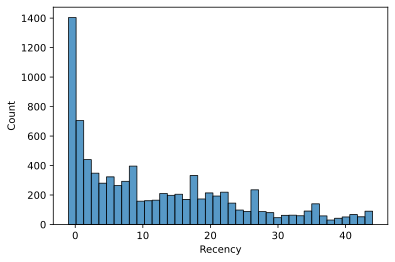

In [ ]:
sns.histplot(customer_profile.Recency, bins=40)


In [ ]:
X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()
#converting into an array 
X = X.values

In [ ]:
X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# range_n_clusters = [3, 4, 5, 6,7,8,9]

In [ ]:
customer_profile[['Frequency_raw','Monetary_Value_raw','Recency_raw']] = customer_profile[['Frequency','Monetary_Value','Recency']].copy()

X = customer_profile[['Frequency','Monetary_Value','Recency']].copy()

for column in X.columns:
    mean = customer_profile[column].mean()
    std = customer_profile[column].std()
    customer_profile[column] = (customer_profile[column]-mean)/std  
   # customer_profile[column] = customer_profile[column].apply(lambda x:replace_outliers(x)) 


customer_profile.dropna(inplace = True)

In [ ]:
# customer_profile['clusters'] = km.labels_


In [ ]:
customer_profile

,account_no,Frequency,Monetary_Value,Recency,Frequency_raw,Monetary_Value_raw,Recency_raw
0,90950001001,-0.01,-0.03,0.68,9,"18,590.00",20
1,114500001001,2.96,6.72,-1.02,2318,"1,078,844,349.00",0
2,204213534001,-0.02,-0.01,0.09,6,"3,003,000.00",13
3,204213580001,0.56,0.03,-1.02,454,"8,771,000.00",0
4,204213589001,0.00,0.04,-0.85,20,"10,517,000.00",2
...,...,...,...,...,...,...,...
8431,256789966029001,-0.01,-0.02,-1.02,10,"1,593,000.00",0
8432,256789973726001,-0.02,-0.03,1.54,1,"18,123.00",30
8433,256789992894001,-0.02,-0.03,-1.02,1,"2,000.00",0
8434,256789993948001,-0.02,-0.01,0.00,2,"3,470,000.00",12


In [ ]:
# customer_profile.groupby('clusters').describe().transpose()

In [ ]:
customer_profile.drop(columns=['Frequency','Monetary_Value','Recency'], inplace = True)
customer_profile

,account_no,Frequency_raw,Monetary_Value_raw,Recency_raw
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
customer_profile.columns=['account_no','Frequency','Monetary_Value','Recency',]
customer_profile

,account_no,Frequency,Monetary_Value,Recency
0,90950001001,9,"18,590.00",20
1,114500001001,2318,"1,078,844,349.00",0
2,204213534001,6,"3,003,000.00",13
3,204213580001,454,"8,771,000.00",0
4,204213589001,20,"10,517,000.00",2
...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0
8432,256789973726001,1,"18,123.00",30
8433,256789992894001,1,"2,000.00",0
8434,256789993948001,2,"3,470,000.00",12


In [ ]:
# customer_profile.drop(['account_no','Recency'],axis=1, inplace=True)
# customer_profile

In [ ]:
Avg_Transaction= customer_profile["Monetary_Value"]/customer_profile["Frequency"]
customer_profile["Avg_Transaction"]=Avg_Transaction
# Loan_Limit= customer_profile["Monetary_Value"]*0.1
# customer_profile["Loan_Limit"]=Loan_Limit
customer_profile

,account_no,Frequency,Monetary_Value,Recency,Avg_Transaction
0,90950001001,9,"18,590.00",20,"2,065.56"
1,114500001001,2318,"1,078,844,349.00",0,"465,420.34"
2,204213534001,6,"3,003,000.00",13,"500,500.00"
3,204213580001,454,"8,771,000.00",0,"19,319.38"
4,204213589001,20,"10,517,000.00",2,"525,850.00"
...,...,...,...,...,...
8431,256789966029001,10,"1,593,000.00",0,"159,300.00"
8432,256789973726001,1,"18,123.00",30,"18,123.00"
8433,256789992894001,1,"2,000.00",0,"2,000.00"
8434,256789993948001,2,"3,470,000.00",12,"1,735,000.00"


In [ ]:
customer_profile.drop(['account_no'],axis=1, inplace=True)
customer_profile

,Frequency,Monetary_Value,Recency,Avg_Transaction
0,9,"18,590.00",20,"2,065.56"
1,2318,"1,078,844,349.00",0,"465,420.34"
2,6,"3,003,000.00",13,"500,500.00"
3,454,"8,771,000.00",0,"19,319.38"
4,20,"10,517,000.00",2,"525,850.00"
...,...,...,...,...
8431,10,"1,593,000.00",0,"159,300.00"
8432,1,"18,123.00",30,"18,123.00"
8433,1,"2,000.00",0,"2,000.00"
8434,2,"3,470,000.00",12,"1,735,000.00"


In [ ]:
Scaler=StandardScaler()
X_scaled=Scaler.fit_transform(customer_profile)
X_scaled

array([[-1.39486714e-02, -2.82050140e-02,  6.82787793e-01,
        -3.48153852e-01],
       [ 2.95722907e+00,  6.72009962e+00, -1.02322110e+00,
         3.76891622e-01],
       [-1.78090149e-02, -9.53683922e-03,  8.56846809e-02,
         4.31783358e-01],
       ...,
       [-2.42429208e-02, -2.83087883e-02, -1.02322110e+00,
        -3.48256431e-01],
       [-2.29561396e-02, -6.61564621e-03,  3.84236237e-04,
         2.36349674e+00],
       [-2.42429208e-02, -2.80710895e-02,  1.53579224e+00,
        -2.88795023e-01]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_scaled.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')

explained variance :
--------------------------------------------------------------------
[1.99265088 1.0530429 ]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[ 0.70573536  0.70666694 -0.03491688  0.03660947]
 [-0.05294759 -0.01858739 -0.70270207  0.70926784]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[-6.63621660e-02 -7.25467918e-01]
 [ 6.88541883e+00  7.04849436e-01]
 [-6.49230375e-03  2.47159456e-01]
 [ 4.37000085e-01  4.61160761e-01]
 [ 7.36509630e-02  9.32815295e-01]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(8436, 2)
--------------------------------------------------------------------
Original Feature shape 

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


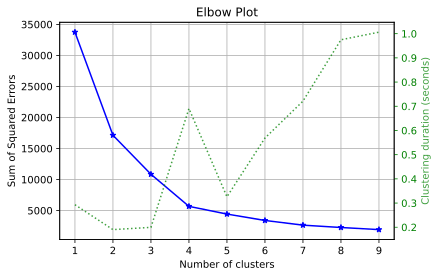

In [ ]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_scaled,cluster_ranges=range(1,10))

In [ ]:
X_train = pd.DataFrame(X_transformed)
X_train.rename(columns = {0:"Monetary_Value", 1:"Frequency"})

,Monetary_Value,Frequency
0,-0.07,-0.73
1,6.89,0.70
2,-0.01,0.25
3,0.44,0.46
4,0.07,0.93
...,...,...
8431,0.01,0.65
8432,-0.10,-1.31
8433,-0.01,0.47
8434,0.07,1.68


In [ ]:
k_means = KMeans(n_clusters=4,random_state=0,init='k-means++')
k_means.fit(X_train)
y_kmeans = k_means.fit_predict(X_train)
labels = k_means.labels_

In [ ]:
len(labels), X_train.shape

(8436, (8436, 2))

In [ ]:
import pickle

filename = 'final_model_Kmean_clustring.pkl'
pickle.dump(k_means, open(filename, 'wb'))

In [ ]:
full_join_df_cluster = pd.concat([X_train, pd.DataFrame({'cluster':labels})], axis = 1)

In [ ]:
full_join_df_cluster

,0,1,cluster
0,-0.07,-0.73,2
1,6.89,0.70,0
2,-0.01,0.25,0
3,0.44,0.46,0
4,0.07,0.93,0
...,...,...,...
8431,0.01,0.65,0
8432,-0.10,-1.31,2
8433,-0.01,0.47,0
8434,0.07,1.68,0
